In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Image Analysis

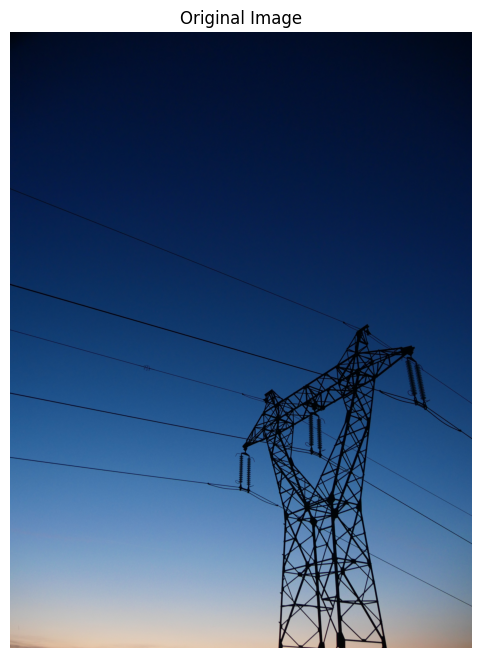

In [ ]:
import cv2
import matplotlib.pyplot as plt

def load_image(image_path):
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image_rgb

image_path = '/content/drive/MyDrive/SEM 7/AIDS-II/Exp-3/Image.jpg'
image = load_image(image_path)

# Display the original image
plt.figure(figsize=(8, 8))
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')
plt.show()

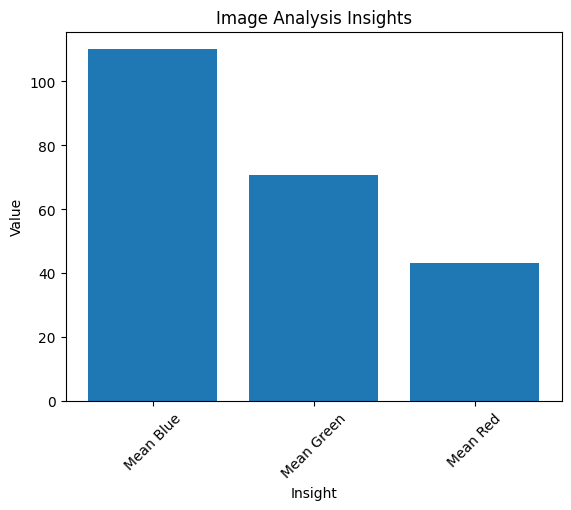

In [ ]:
import cv2
import matplotlib.pyplot as plt

def analyze_image(image_path):
    image = cv2.imread(image_path)


    mean_b = image[:, :, 0].mean()
    mean_g = image[:, :, 1].mean()
    mean_r = image[:, :, 2].mean()

    insights = {
        "Mean Blue": mean_b,
        "Mean Green": mean_g,
        "Mean Red": mean_r
    }

    return insights

def plot_insights(insights):
    keys = insights.keys()
    values = insights.values()

    plt.bar(keys, values)
    plt.xlabel("Insight")
    plt.ylabel("Value")
    plt.title("Image Analysis Insights")
    plt.xticks(rotation=45)

    plt.show()

if __name__ == "__main__":
    image_path = "/content/drive/MyDrive/SEM 7/AIDS-II/Exp-3/Image.jpg"
    insights = analyze_image(image_path)
    plot_insights(insights)


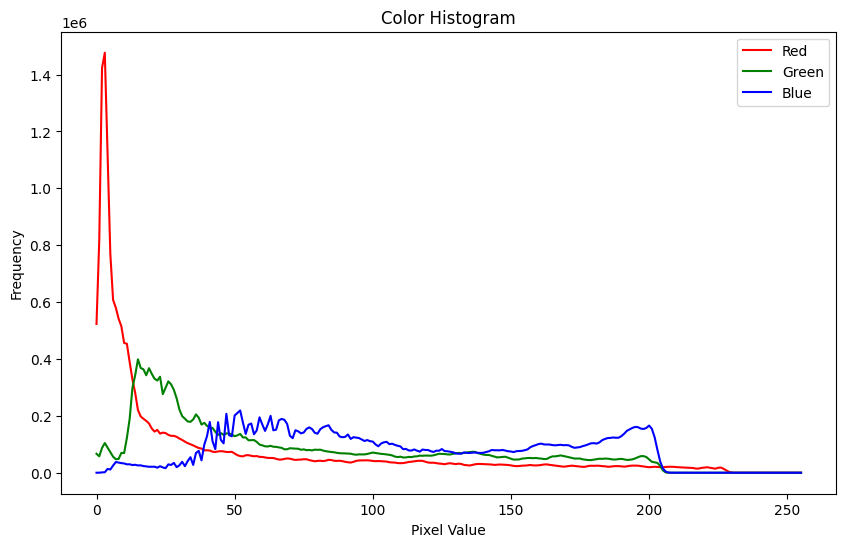

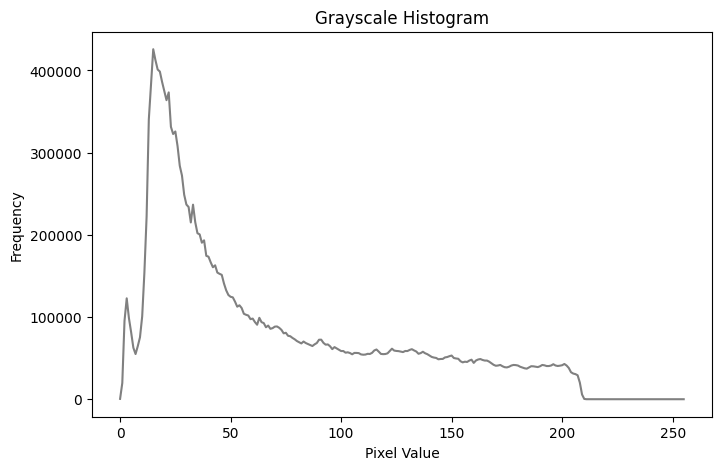

In [ ]:
def plot_color_histogram(image):
    # Calculate the color histogram
    hist_red = cv2.calcHist([image], [0], None, [256], [0, 256])
    hist_green = cv2.calcHist([image], [1], None, [256], [0, 256])
    hist_blue = cv2.calcHist([image], [2], None, [256], [0, 256])

    # Plot the color histograms
    plt.figure(figsize=(10, 6))
    plt.plot(hist_red, color='red', label='Red')
    plt.plot(hist_green, color='green', label='Green')
    plt.plot(hist_blue, color='blue', label='Blue')
    plt.title('Color Histogram')
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

def plot_grayscale_histogram(image):
    # Convert the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

    # Calculate the grayscale histogram
    hist_gray = cv2.calcHist([gray_image], [0], None, [256], [0, 256])

    # Plot the grayscale histogram
    plt.figure(figsize=(8, 5))
    plt.plot(hist_gray, color='gray')
    plt.title('Grayscale Histogram')
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')
    plt.show()

# Perform color and grayscale histogram analysis
plot_color_histogram(image)
plot_grayscale_histogram(image)

# Audio Analysis

In [ ]:
!pip install librosa matplotlib

RuntimeError: ignored

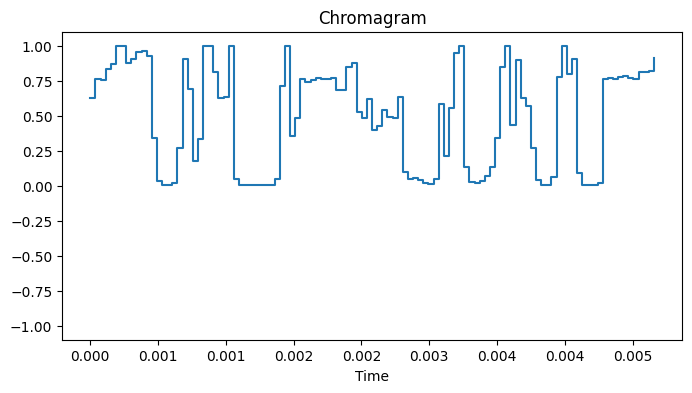

In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

def analyze_audio(audio_path):
    # Load the audio file using librosa
    y, sr = librosa.load(audio_path)

    # Extract audio features (you can add more features as needed)
    tempo, _ = librosa.beat.beat_track(y=y, sr=sr)
    chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
    mfcc = librosa.feature.mfcc(y=y, sr=sr)

    return tempo, chroma_stft, mfcc, sr

def plot_insights(tempo, chroma_stft, mfcc, sr):
    # Plot the Tempo
    plt.figure(figsize=(8, 4))
    librosa.display.waveshow(chroma_stft, sr=sr)
    plt.title('Chromagram')
    plt.colorbar()

    # Plot the Chroma STFT
    plt.figure(figsize=(8, 4))
    librosa.display.specshow(chroma_stft, x_axis='time', y_axis='chroma', sr=sr)
    plt.title('Chromagram')
    plt.colorbar()

    # Plot the MFCCs
    plt.figure(figsize=(8, 4))
    librosa.display.specshow(mfcc, x_axis='time', sr=sr)
    plt.colorbar()
    plt.title('MFCC')

    plt.show()

# Example usage
if __name__ == "__main__":
    audio_path = "/content/drive/MyDrive/SEM 7/AIDS-II/Exp-3/Pikachu Notification.mp3"
    tempo, chroma_stft, mfcc, sr = analyze_audio(audio_path)
    plot_insights(tempo, chroma_stft, mfcc, sr)

# Video Analysis

In [ ]:
from IPython.display import HTML, display
import os

# Replace 'video_filename.mp4' with the actual filename of your video
video_path = '/content/drive/MyDrive/SEM 7/AIDS-II/Exp-3/Video.mp4'

# Check if the video file exists
if not os.path.exists(video_path):
    print("Error: The video file does not exist.")
else:
    # Generate HTML code to display the video
    html_code = f'<video width="640" height="480" controls><source src="{video_path}" type="video/mp4"></video>'

    # Display the video in the notebook
    try:
        display(HTML(html_code))
    except Exception as e:
        print("Error:", e)


In [ ]:
!pip install opencv-python

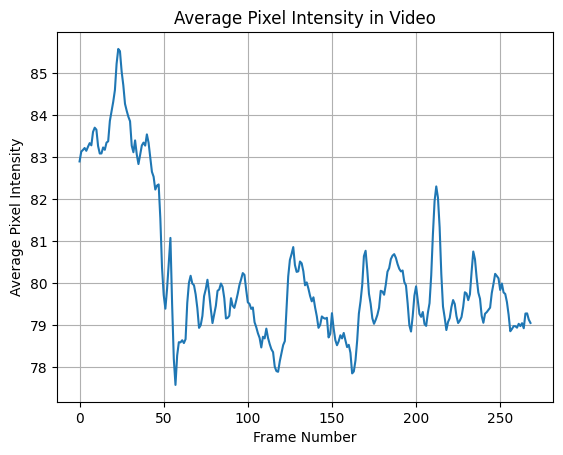

In [ ]:
import cv2
import matplotlib.pyplot as plt

def analyze_video(video_path):
    # Create a VideoCapture object to read the video
    cap = cv2.VideoCapture(video_path)

    frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

    # Initialize an array to store average pixel intensity for each frame
    average_intensities = []

    while True:
        # Read the next frame
        ret, frame = cap.read()

        # Break the loop if the video has ended
        if not ret:
            break

        # Calculate the average pixel intensity for the frame
        avg_intensity = frame.mean()
        average_intensities.append(avg_intensity)

    # Release the VideoCapture object
    cap.release()

    return average_intensities

def plot_insights(average_intensities):
    # Plot the average pixel intensity for each frame
    plt.plot(range(len(average_intensities)), average_intensities)
    plt.xlabel('Frame Number')
    plt.ylabel('Average Pixel Intensity')
    plt.title('Average Pixel Intensity in Video')
    plt.grid(True)
    plt.show()

# Example usage
if __name__ == "__main__":
    video_path = "/content/drive/MyDrive/SEM 7/AIDS-II/Exp-3/Video.mp4"
    average_intensities = analyze_video(video_path)
    plot_insights(average_intensities)


Conclusion:
Hence the Avg. pixel intensity of the video is highest between frame no. range 0 to 50